<h1 align="center"><font color = "firebrick">Unsupervised ML - Clustering</h3>

-------------------------

<img src="https://pbs.twimg.com/media/DsCTvc3XQAE7Njb?format=jpg">

----------------------

In **supervised learning** there are labels/outputs acting as supervisor. <br>Think of it like we are giving someone a mobile phone and a user guide to take help from.

<img src="https://blog.finxter.com/wp-content/uploads/2020/12/image-88.png">

In **unsupervised learning** there are no labels/outputs to act as supervisor. <br>Think of it like we are giving someone a mobile phone and ask them to try and learn how to use it.

<img src="https://blog.finxter.com/wp-content/uploads/2020/12/image-98.png" width = "800">


One major challenge in unsupervised learning is working with performance metrics of the model. Since we do not have any output for the historical data, it's difficult to determine the performance of the model. We tend to do it visually which we will try later.

-----------

Read more about Supervised vs Unsupervised: https://blog.finxter.com/supervised-and-unsupervised-machine-learning/

In Unsupervised ML too, there are sub-parts namely Clustering and Dimensionality Reduction. One of the most common use-case in corporate work is **Clustering** and hence, we will explore that in this notebook.

<font color = "red"> **What is clustering?**

Clustering is a type of unsupervised learning where the references need to be drawn from unlabelled datasets.
    
    Generally, it is used to capture meaningful structure, underlying processes, and grouping inherent in a dataset.
    
    In clustering, the task is to divide the population into several groups in such a way that the data points in the same groups are more similar to each other than the data points in other groups. In short, it is a collection of objects based on their similarities and dissimilarities.

# K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. <br>Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.


<img src="https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png">

## How kMeans work?

- Start with k initial clusters (k needs to be pre-defined)
- At every step, each record is reassigned to the cluster with the “closest” centroid
- Recompute the centroids of clusters that lost or gained a record, and repeat Step 2
- Stop when moving any more records between clusters increases cluster dispersion

<img src="https://i.imgur.com/VLNNMHE.png" width=400>

Open this link and perform the activity to understand how kMeans work: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/


Learn more about kMeans here:
1. https://www.youtube.com/watch?v=4b5d3muPQmA
2. https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


Now, let's perform clustering on the IRIS dataset which we are aware of. In the additional practices, clustering has been done on one more dataset which you can explore.

# 1. Business Problem

Assuming we do not have a column that indicates the variety/species of IRIS flowers, our aim is to cluster or group the flowers in some number of clusters.

Another example of clustering in real-life can be: You work at a bank which wants to offer new limits on credit cards. As a banker, you cannot give the same limit to all customers. Hence, you would want to cluster the customers based on their income and expenses, for example, and then offer them different limits for their credit cards.

# 2. Data import

### Loading the required libraries

Previously, we have used IRIS dataset from our local folder. This time, however, we are going to import IRIS dataset which is pre-built and stored in `sklearn`. There are many sample datasets already loaded to `sklearn` which you can import and use.

Refer here to see those datasets: https://scikit-learn.org/stable/datasets.html

In [1]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # using this, we will import iris dataset from sklearn


# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --upgrade sckit-learn matplotlib

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


### Importing the data

In [2]:
# Load the iris dataset
iris= datasets.load_iris()
iris_df= pd.DataFrame(iris.data,columns =iris.feature_names)
iris_df.head() # Gives us the first 5 rows to view as a sample


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



One thing you may want to notice that the dataset has only 4 columns. The column to represent the target variable or species of the flower is not there. This is because that column is stored separately in `sklearn.datasets`

You can learn about the data characteristics here: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset


We are already familiar with the data hence, not going through all exploration.


# 3. Data Modelling

## Deciding optimal k value

Since anybody can randomly select k value, we should have a criteria to select the optimal k.

We use **Elbow method** for this purpose.

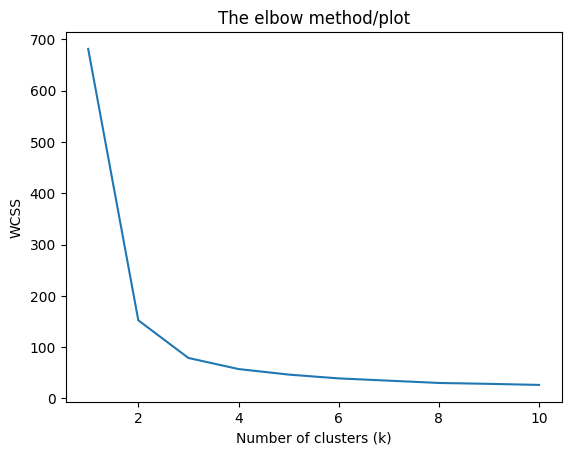

In [10]:
# Convert our dataframe to a form which is usable by kmeans
x =  iris_df.iloc[:,0:4].values

# Import our kmeans algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS - Plot the elbow plot
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia

# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The elbow method uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters. We would choose a **value of k where the SSE begins to flatten out** and we see an inflection point.

In [11]:
# We have decided on a k value = 3

kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(x) # Training the model on input data

print(kmeans_model)

y_kmeans = kmeans_model.predict(x)

KMeans(n_clusters=3)


## Getting Labels of Each Record

To retrieve the K-Means model's clusters, use `.labels_`, which gives a list of labels for the DataFrame. With the list of labels, we can create a new column and add it to the dataframe of `iris_df`.

In [12]:
print('Each flower\'s clusters:', kmeans_model.labels_)
iris_df['variety'] = kmeans_model.labels_
iris_df.head()

Each flower's clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Visualize the clusters

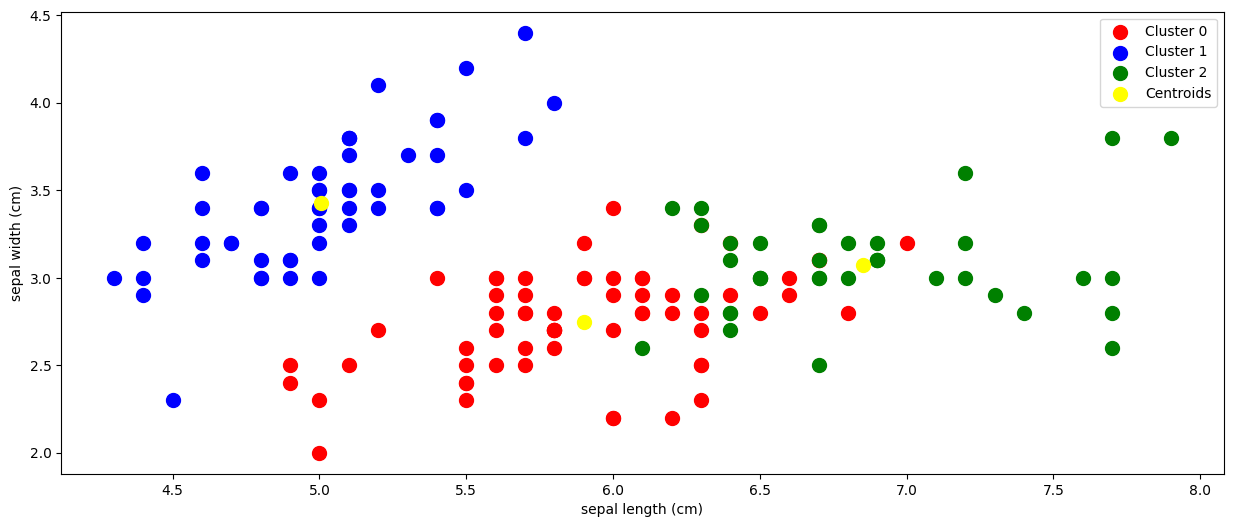

In [13]:
# Visualize the clusters
# 2D plots on any 2 columns

plt.figure(figsize=(15,6))

# Plot scatter plots
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
           s=100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
           s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
           s=100, c='green', label='Cluster 2')

# Cluster Centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],
           s=100, c='yellow', label='Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [14]:
import plotly.express as px

fig = px.scatter_3d(iris_df, x = 'sepal length (cm)', y = 'sepal width (cm)', z = 'petal length (cm)',
                    color = 'variety', symbol = 'variety')
fig.show()

If the clusters are separated enough from each other, that means the clustering is good. We cannot use methods such as accuracy or classification matrix to understand the accuracy.

Although for IRIS dataset, we know what target variable so here, classification matrix can be created. However, in real-world, when dataset does not contain output column, we perform clustering analysis like this.

## Predict

Based on the existing clustering model, we can predict the class/variety of a new IRIS flower  using `kmeans.predict()`. This method takes in a `DataFrame`, as shown below.

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [16]:
newFlower = pd.DataFrame([{'sepal length (cm)' : 0.8,
                    'sepal width (cm)' : 1.955,
                    'petal length (cm)' : 2.124,
                    'petal width (cm)' : 1.5}])

display(newFlower)

kmeans_model.predict(newFlower[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.8,1.955,2.124,1.5


array([1], dtype=int32)

There are some additional kMeans analysis given in additional learning. Please take some time to explore those as well.

-----------------------------------------
##### <center> End of Notebook </center>

---------------------------------------